## Probeweise Durchführung einer Teststatistik für Tokenfrequency pro Vers

1. Hypothesen
- **Nullhypothese (H0)**: Es gibt zwischen den beiden Subsamples (M/W) **keinen signifikanten Unterschied** in der Tokenanzahl/Vers (= Länge der Verse).
- **Alternativhypothese (H1)**: Es gibt zwischen den beiden Subsamples (M/W) **einen signifikanten Unterschied** in der Tokenanzahl/Vers (= Länge der Verse).
    - &rarr; "Frauen schreiben Gedichte mit längeren Verse als Männer. Männer schreiben im Verlgeich zu Frauen kürzere Verse in ihren Gedichten."

In [1]:
import os
import json
import statistics
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, shapiro, mannwhitneyu
from collections import Counter

nlp = spacy.load("de_core_news_md")

2. Daten vorbereiten

Für jedes Teilkorpus:
- Liste mit Tokenanzahl für jede Line
- len(tokens_per_line_list_m/w) = Gesamtzahl der Verse pro Teilkorpus

In [2]:
# Erstelle Liste mit absoluter Häufigkeit von Tokens/Line für Gedicht
def count_tokens_per_line(poem):
    tokens_per_line = []
    for line in poem.values():
        text = line['text']
        doc = nlp(text)
        tokens_per_line.append(len(doc))
    return tokens_per_line

# Iteriere über alle JSON-Dateien im Korpus
# bestimme für jedes Gedicht und jeden Vers darin die Anzahl der Tokens
def list_tokens_per_line(corpus_folder):
    tokens_per_line_list = []
    for filename in os.listdir(corpus_folder):
        if filename.endswith('.json'):
            with open(os.path.join(corpus_folder, filename), 'r', encoding='utf8') as file:
                data = json.load(file)
                if data['poem'] and data['author_birth'] != "0":
                    poem = data['poem']
                    tokens_per_line_list.extend(count_tokens_per_line(poem))
    return tokens_per_line_list

# Liste mit der absoluten Anzahl von Tokens für alle Verse im Korpus 'M'
tokens_per_line_list_m = list_tokens_per_line('corpus_finished_m')

# Liste mit der absoluten Anzahl von Tokens für alle Verse im Korpus 'W'
tokens_per_line_list_w = list_tokens_per_line('corpus_finished_w')

# Anzeige von Ausschnitten
print(tokens_per_line_list_m[:100])
print(tokens_per_line_list_w[:100])

[1, 2, 3, 2, 2, 3, 3, 8, 9, 2, 2, 2, 3, 9, 2, 3, 4, 6, 9, 3, 3, 11, 4, 6, 14, 1, 6, 5, 4, 4, 1, 4, 4, 3, 3, 3, 3, 4, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 4, 4, 4, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 4, 4, 4, 4, 3, 3, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 10, 6, 6, 4]
[4, 5, 5, 4, 4, 4, 4, 5, 3, 5, 3, 5, 7, 5, 6, 4, 7, 5, 4, 6, 5, 4, 4, 6, 5, 7, 5, 4, 4, 3, 4, 2, 5, 3, 4, 3, 5, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 3, 5, 5, 4, 5, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 7, 10, 7, 9, 8, 10, 12, 12, 12, 3]


In [3]:
# Welche möglichen Daten gibt es?
print(Counter(tokens_per_line_list_m))
print(Counter(tokens_per_line_list_w))

Counter({6: 4650, 5: 4554, 7: 4040, 4: 3918, 8: 3457, 3: 3131, 9: 2705, 2: 1918, 10: 1749, 1: 1727, 11: 1138, 12: 744, 13: 501, 14: 343, 15: 212, 16: 148, 0: 87, 17: 84, 18: 48, 19: 27, 20: 13, 22: 7, 21: 7, 37: 5, 24: 5, 51: 4, 25: 4, 23: 4, 28: 3, 59: 3, 26: 3, 32: 2, 41: 2, 60: 2, 29: 2, 85: 2, 123: 2, 38: 2, 141: 1, 317: 1, 100: 1, 93: 1, 69: 1, 75: 1, 90: 1, 134: 1, 45: 1, 31: 1, 72: 1, 50: 1, 44: 1, 42: 1, 57: 1, 191: 1, 40: 1, 179: 1, 333: 1, 47: 1, 46: 1, 253: 1, 151: 1, 348: 1, 176: 1, 122: 1, 145: 1, 87: 1, 109: 1, 63: 1, 160: 1, 144: 1, 115: 1, 101: 1, 84: 1, 89: 1, 277: 1, 311: 1, 39: 1, 43: 1, 76: 1, 66: 1, 92: 1, 178: 1, 61: 1, 113: 1, 27: 1, 36: 1, 235: 1, 121: 1, 74: 1, 177: 1, 161: 1, 64: 1, 65: 1, 67: 1, 35: 1})
Counter({5: 2643, 6: 2491, 4: 2469, 7: 2242, 3: 2062, 8: 1812, 9: 1381, 2: 1366, 1: 976, 10: 909, 11: 661, 12: 428, 13: 299, 14: 193, 15: 125, 0: 70, 16: 68, 17: 40, 18: 21, 19: 10, 24: 6, 23: 6, 29: 5, 25: 5, 20: 5, 28: 4, 32: 3, 53: 3, 21: 3, 33: 3, 94: 3, 2

3. Deskriptive Statistik

In [4]:
# Deskriptive Statistik für beide Subsamples (M/W)
# Mittelwert
mean_m = statistics.mean(tokens_per_line_list_m)
mean_w = statistics.mean(tokens_per_line_list_w)

# Standardabweichung
std_dev_m = statistics.stdev(tokens_per_line_list_m)
std_dev_w = statistics.stdev(tokens_per_line_list_w)

sample_size_m = len(tokens_per_line_list_m)
sample_size_w = len(tokens_per_line_list_w)

print("Mittlere Tokenfrequenz/Vers für männliche Autoren:", mean_m)
print("Mittlere Tokenfrequenz/Vers für weibliche Autoren:", mean_w)
print("Standardabweichung für männliche Autoren:", std_dev_m)
print("Standardabweichung für weibliche Autoren:", std_dev_w)
print("Stichprobengröße für männliche Autoren:", sample_size_m)
print("Stichprobengröße für weibliche Autoren:", sample_size_w)

Mittlere Tokenfrequenz/Vers für männliche Autoren: 6.492806570376664
Mittlere Tokenfrequenz/Vers für weibliche Autoren: 6.356767637095587
Standardabweichung für männliche Autoren: 6.528295581803929
Standardabweichung für weibliche Autoren: 6.525602072058095
Stichprobengröße für männliche Autoren: 35310
Stichprobengröße für weibliche Autoren: 20369


In [5]:
# Median (weil immer ganze Zahlen, lassen sich die Daten gut wie Ordinaldaten behandeln)

def calculate_median(data):
    # Sortiere die Liste in aufsteigender Reihenfolge
    sorted_data = sorted(data)
    n = len(sorted_data)

    if n % 2 == 1:
        # Wenn die Anzahl der Elemente ungerade ist
        median = sorted_data[n // 2]
    else:
        # Wenn die Anzahl der Elemente gerade ist
        median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

    return float(median)


# Berechne den Median für beide Subsamples
median_vers_length_m = calculate_median(tokens_per_line_list_m)
median_vers_length_w = calculate_median(tokens_per_line_list_w)

print("Median der Verslängen für männliche Autoren:", median_vers_length_m)
print("Median der Verslängen für weibliche Autoren:", median_vers_length_w)

Median der Verslängen für männliche Autoren: 6.0
Median der Verslängen für weibliche Autoren: 6.0


Anhand der deskriptiven Statistik lässt sich bereits vermuten, dass es keinen signifikanten Unterschied zwischen der durchschnittlichen Länge von weiblichen und männlichen Versen im Korpus gibt, sondern diese annähernd gleich lang sind.

4. Statistischer Test

## Teststatistik: t-Test?
Vorausssetzung ist Normalverteilung, also Normalverteilung der Tokenfrequency testen:

In [6]:
# Funktion zum Durchführen des Shapiro-Wilk-Tests und zur Interpretation der Ergebnisse
def test_normality(data, sample_name):
    stat, p_value = shapiro(data)
    alpha = 0.05  # Signifikanzniveau
    print(f"Shapiro-Wilk-Test für {sample_name}:")
    print("Teststatistik:", stat)
    print("p-Wert:", p_value)
    if p_value > alpha:
        print(f"Die Tokenfrequenzen für {sample_name} sind normalverteilt.")
    else:
        print(f"Die Tokenfrequenzen für {sample_name} sind nicht normalverteilt.")

# Durchführung des Tests für beide Subsamples
test_normality(tokens_per_line_list_m, "Sample M")
test_normality(tokens_per_line_list_w, "Sample W")

Shapiro-Wilk-Test für Sample M:
Teststatistik: 0.3390337824821472
p-Wert: 0.0
Die Tokenfrequenzen für Sample M sind nicht normalverteilt.
Shapiro-Wilk-Test für Sample W:
Teststatistik: 0.3650616407394409
p-Wert: 0.0
Die Tokenfrequenzen für Sample W sind nicht normalverteilt.


C:\Users\cravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Visualisierung für (Nicht-)Normalverteilung

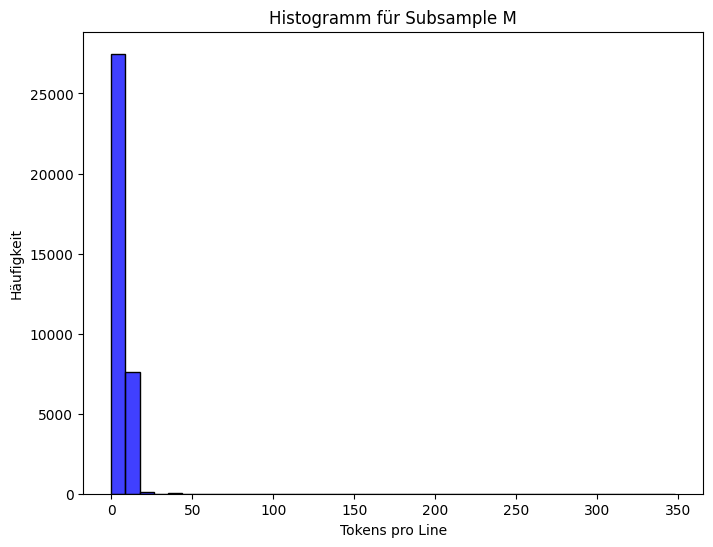

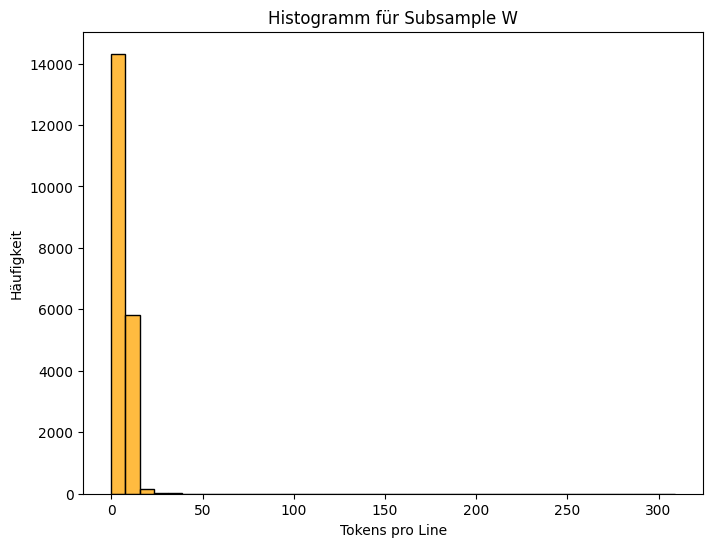

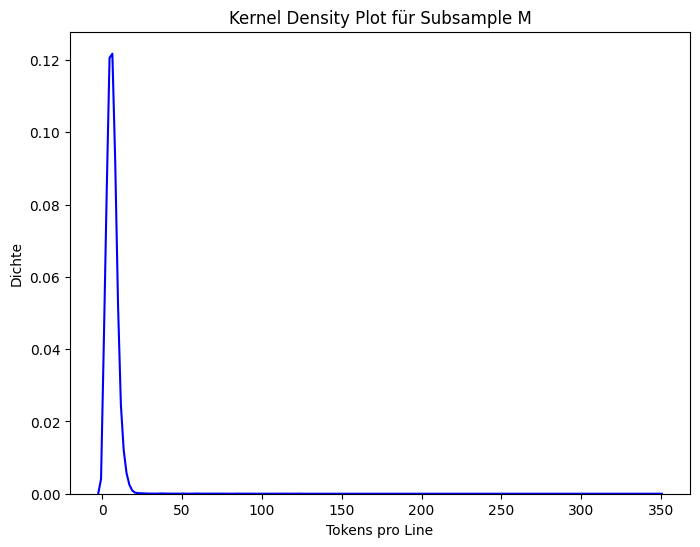

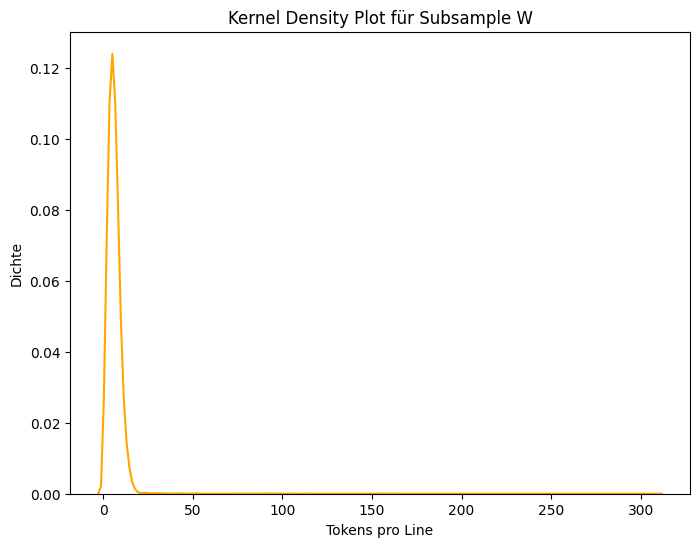

In [7]:
# Histogramm für Subsample M
plt.figure(figsize=(8, 6))
sns.histplot(tokens_per_line_list_m, kde=False, color='blue', bins=40)
plt.title('Histogramm für Subsample M')
plt.xlabel('Tokens pro Line')
plt.ylabel('Häufigkeit')
plt.show()

# Histogramm für Subsample W
plt.figure(figsize=(8, 6))
sns.histplot(tokens_per_line_list_w, kde=False, color='orange', bins=40)
plt.title('Histogramm für Subsample W')
plt.xlabel('Tokens pro Line')
plt.ylabel('Häufigkeit')
plt.show()

# Kernel Density Plot für Subsample M
plt.figure(figsize=(8, 6))
sns.kdeplot(tokens_per_line_list_m, color='blue')
plt.title('Kernel Density Plot für Subsample M')
plt.xlabel('Tokens pro Line')
plt.ylabel('Dichte')
plt.show()

# Kernel Density Plot für Subsample W
plt.figure(figsize=(8, 6))
sns.kdeplot(tokens_per_line_list_w, color='orange')
plt.title('Kernel Density Plot für Subsample W')
plt.xlabel('Tokens pro Line')
plt.ylabel('Dichte')
plt.show()

&rarr; keine Normalverteilung, also anderer Test, nicht t-Test?

## Versuch: t-Test

- Begründung: eine unschöne, aber mögliche Option, weil t-Test relativ robust ist (siehe Stefanowitsch, Kap. 6, S. 197)
- bietet sich aber hier eig. echt nicht an, weil die vorliegenden Daten sehr unschwer auch als Ordinaldaten verwendet werden könnten

In [8]:
# Signifikanztest (t-Test)
t_statistic, p_value = ttest_ind(tokens_per_line_list_m, tokens_per_line_list_w, equal_var=False)

# Berechne die Degrees of Freedom (Freiheitsgrade)
# Degrees of Freedom = (Anzahl der Beobachtungen in Sample 1) + (Anzahl der Beobachtungen in Sample 2) - 2
degree_of_freedom = sample_size_m + sample_size_w - 2

print("Ergebnisse des t-Tests:")
print("t-Statistik:", t_statistic)
print("p-Wert:", p_value)
print("Freiheitsgrad:", degree_of_freedom)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")
    
print(f"(t({degree_of_freedom}) = {round(t_statistic, 3)}, p > 0.05)")

Ergebnisse des t-Tests:
t-Statistik: 2.368999931580075
p-Wert: 0.01784070020157719
Freiheitsgrad: 55677
Es gibt einen signifikanten Unterschied zwischen den Subsamples.
(t(55677) = 2.369, p > 0.05)


- Test scheitert nicht, Voraussetzungen dafür sind aber eigentlich nicht gegebn
- Ergebnis: **&rarr; Nullhypothese kann nicht abgelehnt werden.**

## &rarr; **Mann-Whitney-U-Test** (= Test für Ordinaldaten)
- Ausweichmöglichkeit, wenn t-Test wegen nicht normalverteilten Daten nicht sinnvoll ist (siehe Stefanowitsch, Kap. 6, S. 198)

In [9]:
# Durchführung des Mann-Whitney-U-Tests
u_statistic, p_value = mannwhitneyu(tokens_per_line_list_m, tokens_per_line_list_w, alternative='two-sided')

# Ausgabe der Ergebnisse
print("Mann-Whitney-U-Test:")
print("U-Statistik:", u_statistic)
print("p-Wert:", p_value)

if p_value > 0.05:
    print("Es gibt keinen signifikanten Unterschied zwischen den Subsamples.")
else:
    print("Es gibt einen signifikanten Unterschied zwischen den Subsamples.")

print(f"(U = {u_statistic}, N1 = {sample_size_m}, N2 = {sample_size_w}, p > 0.05)")

Mann-Whitney-U-Test:
U-Statistik: 373757784.5
p-Wert: 7.25416614454023e-15
Es gibt einen signifikanten Unterschied zwischen den Subsamples.
(U = 373757784.5, N1 = 35310, N2 = 20369, p > 0.05)


5. Visualisierung

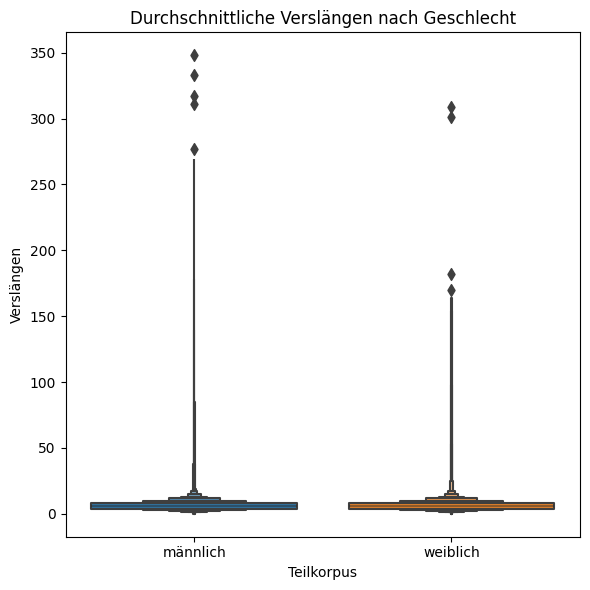

In [10]:
# Zusammenführen der Daten in einem DataFrame für seaborn
import pandas as pd
data = pd.DataFrame({
    "Geschlecht": ["männlich"] * sample_size_m + ["weiblich"] * sample_size_w,
    "Durchschnittliche Verslänge": tokens_per_line_list_m + tokens_per_line_list_w
})

# Boxplot erstellen
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxenplot(x="Geschlecht", y="Durchschnittliche Verslänge", data=data, ax=ax)

# Label und Titel bestimmen
plt.xlabel("Teilkorpus")
plt.ylabel("Verslängen")
plt.title("Durchschnittliche Verslängen nach Geschlecht")


# Plot anzeigen
plt.tight_layout()
plt.show()

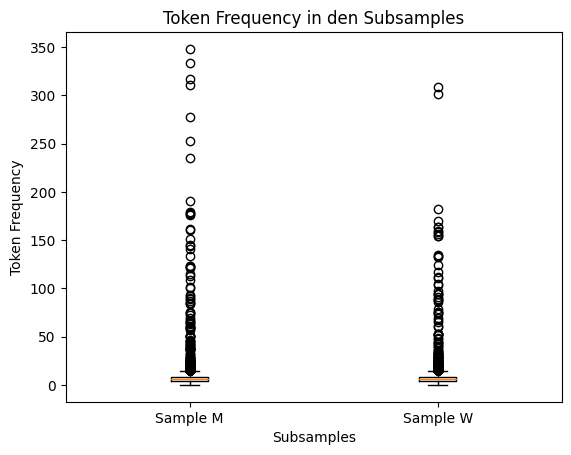

In [11]:
import matplotlib.pyplot as plt

# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots()

# Plotten der Daten als Boxplots
ax.boxplot([tokens_per_line_list_m, tokens_per_line_list_w], labels=['Sample M', 'Sample W'])

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Subsamples')
ax.set_ylabel('Token Frequency')
ax.set_title('Token Frequency in den Subsamples')

# Anzeigen der Grafik
plt.show()

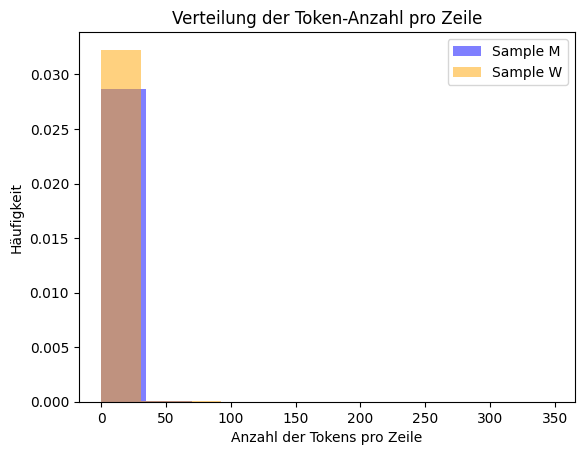

In [12]:
# Erstelle eine Figure und Axes-Objekte
fig, ax = plt.subplots()

# Plotten der Histogramme für beide Subsamples
ax.hist(tokens_per_line_list_m, bins=10, alpha=0.5, label='Sample M', color='blue', density=True)
ax.hist(tokens_per_line_list_w, bins=10, alpha=0.5, label='Sample W', color='orange', density=True)

# Hinzufügen von Labels und Titeln
ax.set_xlabel('Anzahl der Tokens pro Zeile')
ax.set_ylabel('Häufigkeit')
ax.set_title('Verteilung der Token-Anzahl pro Zeile')

# Legende anzeigen
ax.legend()

# Anzeigen der Grafik
plt.show()